<h3><b><u>Data Description:</u></b></h3>
<p>
The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.
</p>

<h3><b><u>Context: </u></b></h3>
<p>
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.
<p>


<p>
<b>
  <h3>Importing necessary librarys</h3>
</b>
</p>

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ds_path = "/content/drive/My Drive/GreatLearning/UnsupervisedLearning/UnsupervisedLearningProject/vehicle.csv"
dataset = pd.read_csv(ds_path)
dataset.head(10)

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus
5          107          NaN  ...            183    bus
6           97         43.0  ...            204    bus
7           90         43.0  ...            202    van
8           86         34.0  ...            208    van
9           93         44.0  ...            204    car

[10 rows x 19 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
dataset.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

All the independent varibles are of either int64 or float64 except for the target varible class
will later encode the categorical varible class for further analysis

<b><h4><u>Checking for missing values:</u></h4></b>

In [6]:
dataset.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

<p>There we can see many missing values</p>
<ul>
  <li>circularity:  <span style="color: red">5</span></li>
  <li>distance_circularity:  <span style="color: red">5</span></li>
  <li>radius_ratio:  <span style="color: red">6</span></li>
  <li>pr.axis_aspect_ratio:  <span style="color: red">2</span></li>
  <li>scatter_ratio:  <span style="color: red">1</span></li>
  <li>elongatedness:  <span style="color: red">1</span></li>
  <li>pr.axis_rectangularity:  <span style="color: red">3</span></li>
  <li>scaled_variance:  <span style="color: red">3</span></li>
  <li>scaled_variance.1:  <span style="color: red">2</span></li>
  <li>scaled_radius_of_gyration:  <span style="color: red">2</span></li>
  <li>scaled_radius_of_gyration.1:  <span style="color: red">4</span></li>
  <li>skewness_about:  <span style="color: red">6</span></li>
  <li>skewness_about.1:  <span style="color: red">1</span></li>
  <li>skewness_about.2:  <span style="color: red">1</span></li>
</ul>


# **Data Preprocessing**

<b><h3><u>Encoding Categorical varible:</u></h3></b>

In [7]:
lable_encoder = LabelEncoder()
dataset.iloc[:, -1:] = lable_encoder.fit_transform(dataset.iloc[:, -1:])

In [8]:
dataset.head(10)

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197      2
1           91         41.0  ...            199      2
2          104         50.0  ...            196      1
3           93         41.0  ...            207      2
4           85         44.0  ...            183      0
5          107          NaN  ...            183      0
6           97         43.0  ...            204      0
7           90         43.0  ...            202      2
8           86         34.0  ...            208      2
9           93         44.0  ...            204      1

[10 rows x 19 columns]

<u><b><h4>Dealing With Missing values:</h4></b></u>

In [9]:
missing_value_imputer_knn = KNNImputer(missing_values=np.NAN, n_neighbors=5)
dataset.iloc[:, :-1] = missing_value_imputer_knn.fit_transform(dataset.iloc[:, :-1])
dataset.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

<p>
Here we can see from the above result we can see we have treated the missing   values with KNN Imputer from sklearn library. From knn Imputer all the missing value will be replace by the KNN algorithm with the value with the rows value who's characters are similar in nature of that of the row with missing value
</p>

In [10]:
dataset.head(10)

compactness  circularity  ...  hollows_ratio  class
0         95.0         48.0  ...          197.0      2
1         91.0         41.0  ...          199.0      2
2        104.0         50.0  ...          196.0      1
3         93.0         41.0  ...          207.0      2
4         85.0         44.0  ...          183.0      0
5        107.0         56.6  ...          183.0      0
6         97.0         43.0  ...          204.0      0
7         90.0         43.0  ...          202.0      2
8         86.0         34.0  ...          208.0      2
9         93.0         44.0  ...          204.0      1

[10 rows x 19 columns]

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

<b><h3>
<u>Observation:</u>
</h3></b>
<p>
 From the above result we can see that all the column that where imputed have been changed there data type to float64 
</p>

In [12]:
dataset.shape

(846, 19)

<b>FIVE POINT SUMMARY</b>

In [13]:
dataset.describe().T

count        mean  ...    75%     max
compactness                  846.0   93.678487  ...  100.0   119.0
circularity                  846.0   44.863593  ...   49.0    59.0
distance_circularity         846.0   82.096454  ...   98.0   112.0
radius_ratio                 846.0  168.955319  ...  195.0   333.0
pr.axis_aspect_ratio         846.0   61.691489  ...   65.0   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.0    55.0
scatter_ratio                846.0  168.839480  ...  198.0   265.0
elongatedness                846.0   40.934043  ...   46.0    61.0
pr.axis_rectangularity       846.0   20.582742  ...   23.0    29.0
max.length_rectangularity    846.0  147.998818  ...  159.0   188.0
scaled_variance              846.0  188.625059  ...  217.0   320.0
scaled_variance.1            846.0  439.921749  ...  587.0  1018.0
scaled_radius_of_gyration    846.0  174.710402  ...  198.0   268.0
scaled_radius_of_gyration.1  846.0   72.464775  ...   75.0   135.0
skewness_about               846.0    6.367376  ...    9.0    22.0
skewness_about.1             846.0   12.599764  ...   19.0    41.0
skewness_about.2             846.0  188.926950  ...  193.0   206.0
hollows_ratio                846.0  195.632388  ...  201.0   211.0
class                        846.0    0.977541  ...    1.0     2.0

[19 rows x 8 columns]

<b>Measuring of Skewness</b>

In [14]:
skewData = {"Column-Names": list(dataset.skew().index), "Skewness": list(dataset.skew())}
skew = pd.DataFrame(data=skewData)
skew

Column-Names  Skewness
0                   compactness  0.381271
1                   circularity  0.261665
2          distance_circularity  0.107945
3                  radius_ratio  0.389461
4          pr.axis_aspect_ratio  3.824626
5       max.length_aspect_ratio  6.778394
6                 scatter_ratio  0.605832
7                 elongatedness  0.047754
8        pr.axis_rectangularity  0.770684
9     max.length_rectangularity  0.256359
10              scaled_variance  0.651503
11            scaled_variance.1  0.835804
12    scaled_radius_of_gyration  0.279581
13  scaled_radius_of_gyration.1  2.074270
14               skewness_about  0.775617
15             skewness_about.1  0.689207
16             skewness_about.2  0.246641
17                hollows_ratio -0.226341
18                        class  0.031106

<u><h3><b>Observations:</b></h3></u>
<ul>
  <li>pr.axis_aspect_ratio has high skewness over 3</li>
  <li>max.length_aspect_ratio has very high skewness it is over 6</li>
  <li>scaled_radius_of_gyration.1 also has high skewness its over 2</li>
  <li>hollows_ratio  has negative skewness -0.22</li>
</ul>

<h3>
  <b>
    <u>Univarate and Bivarate Data Analysis</u>
  </b>
</h3>

<Figure size 7200x7200 with 0 Axes>

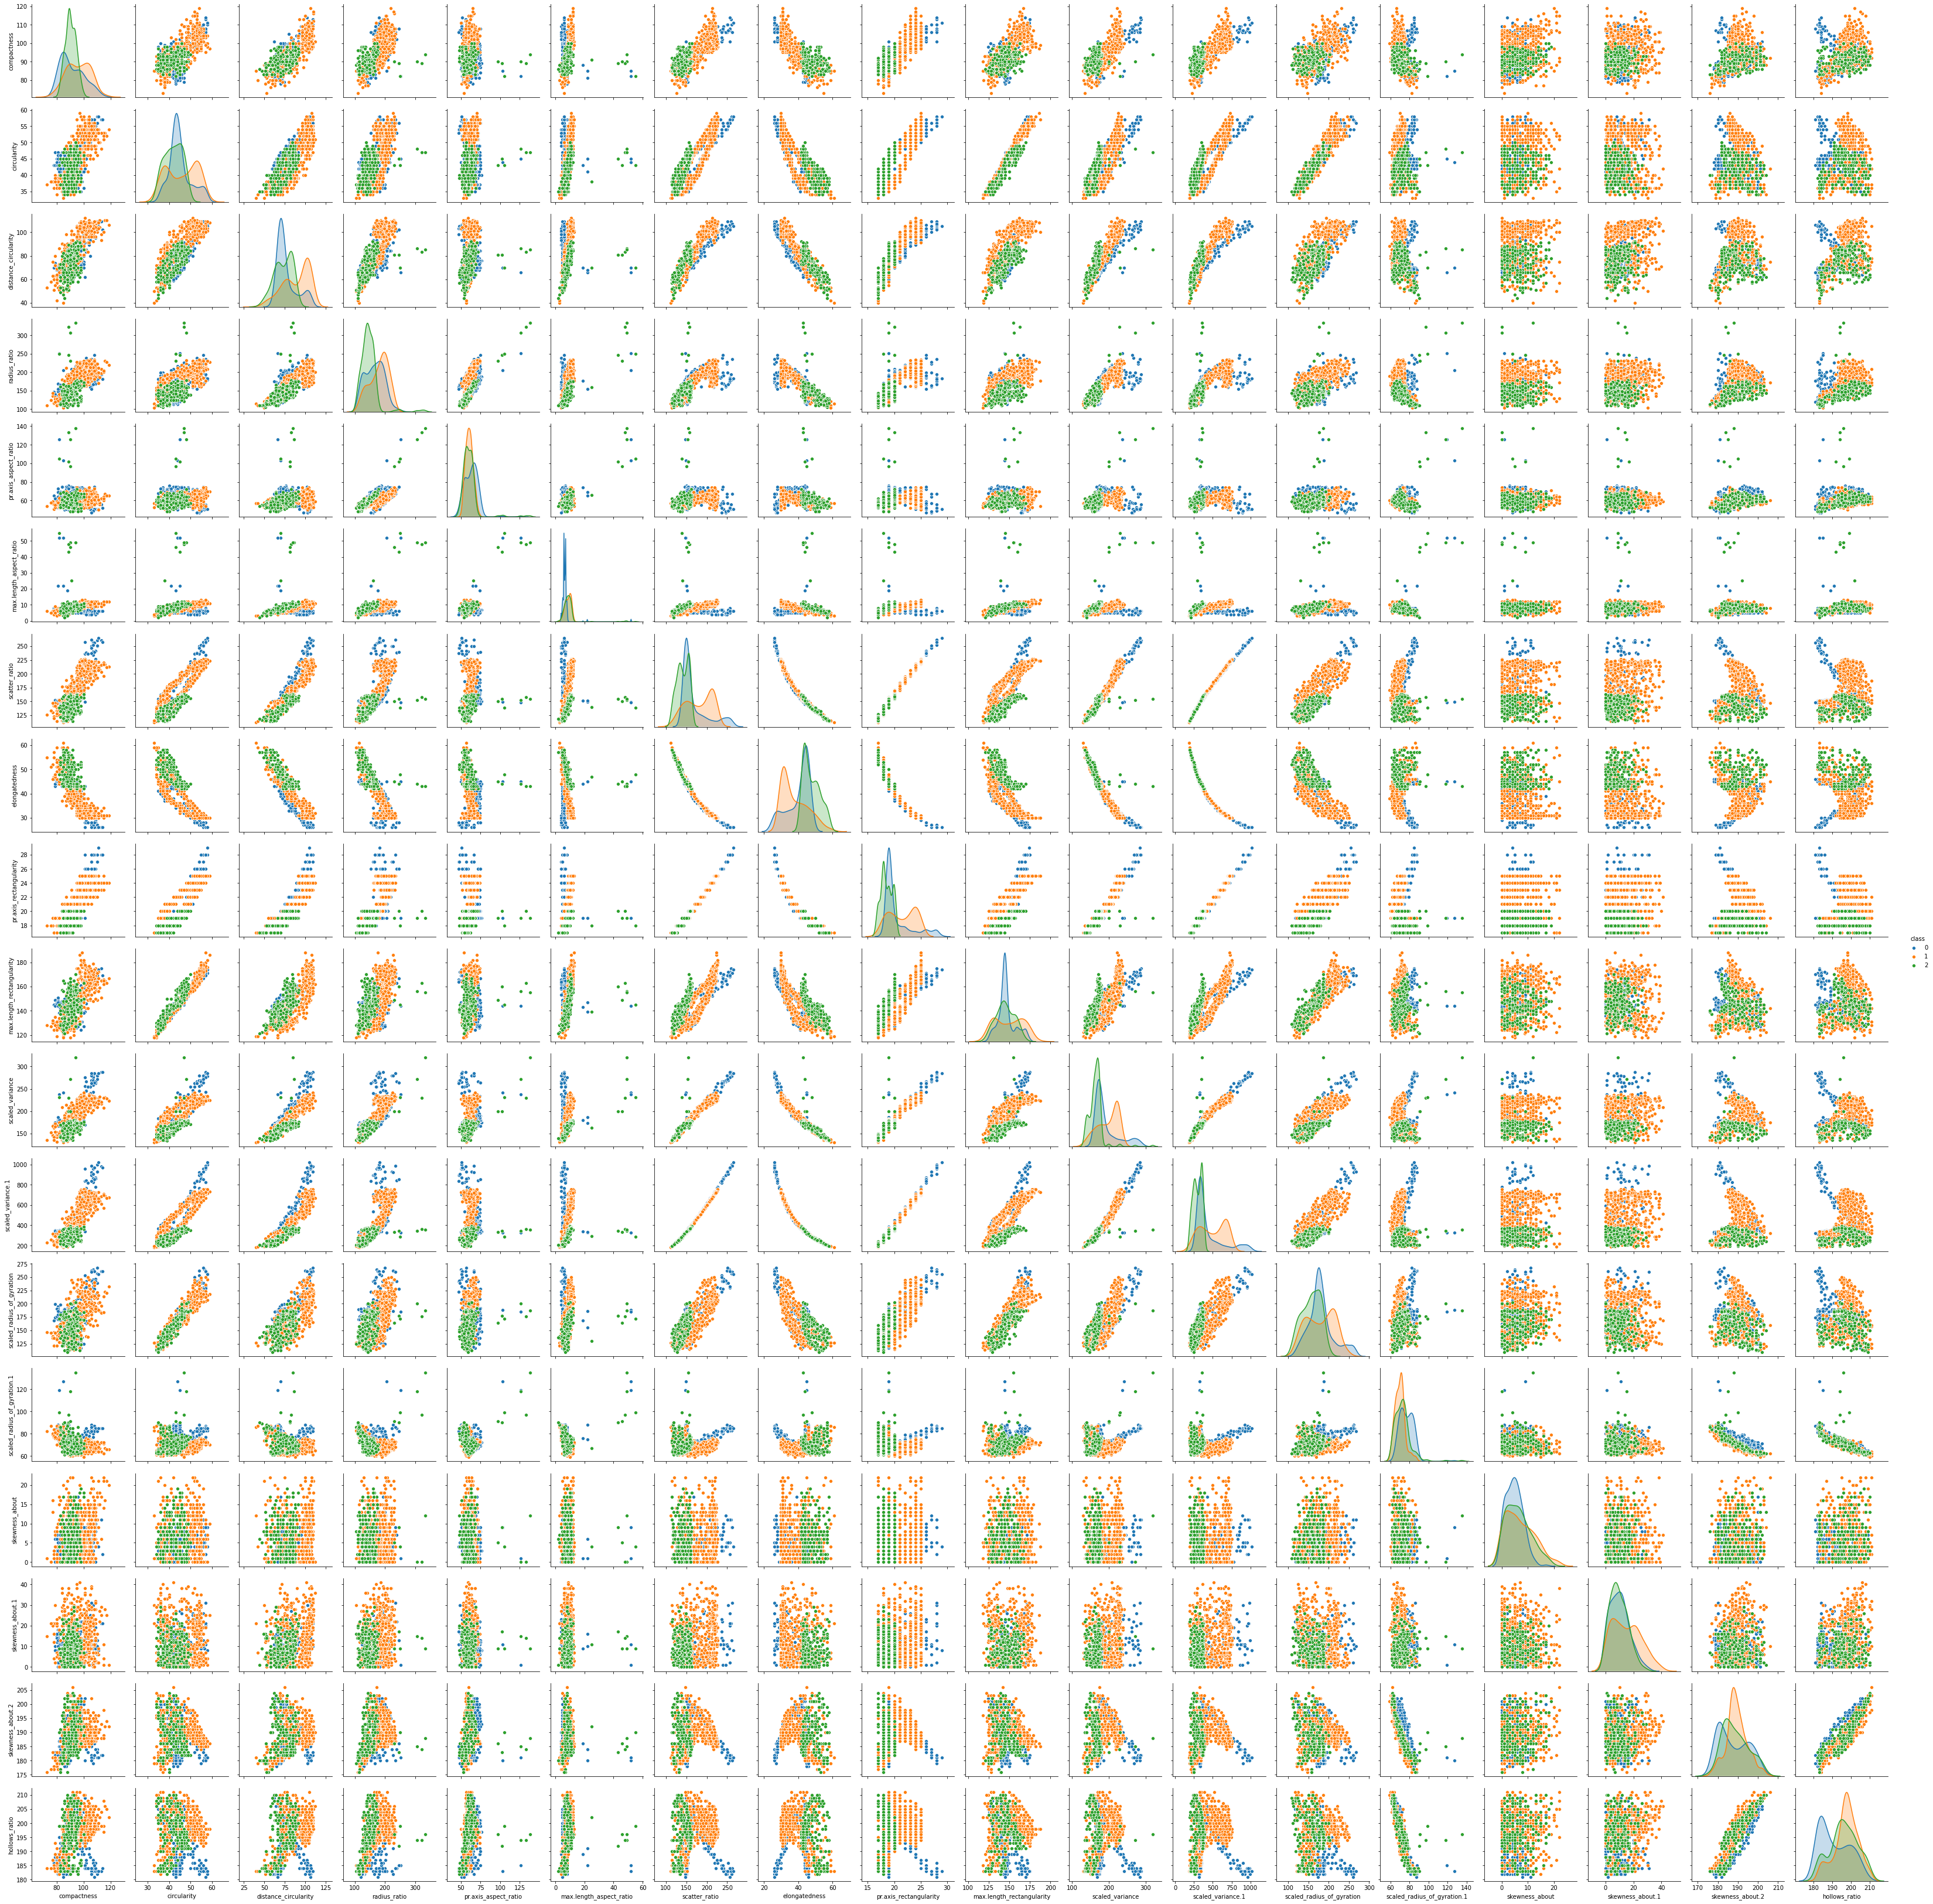

In [15]:
plt.figure(figsize=(100, 100))
sns.pairplot(dataset, hue='class')

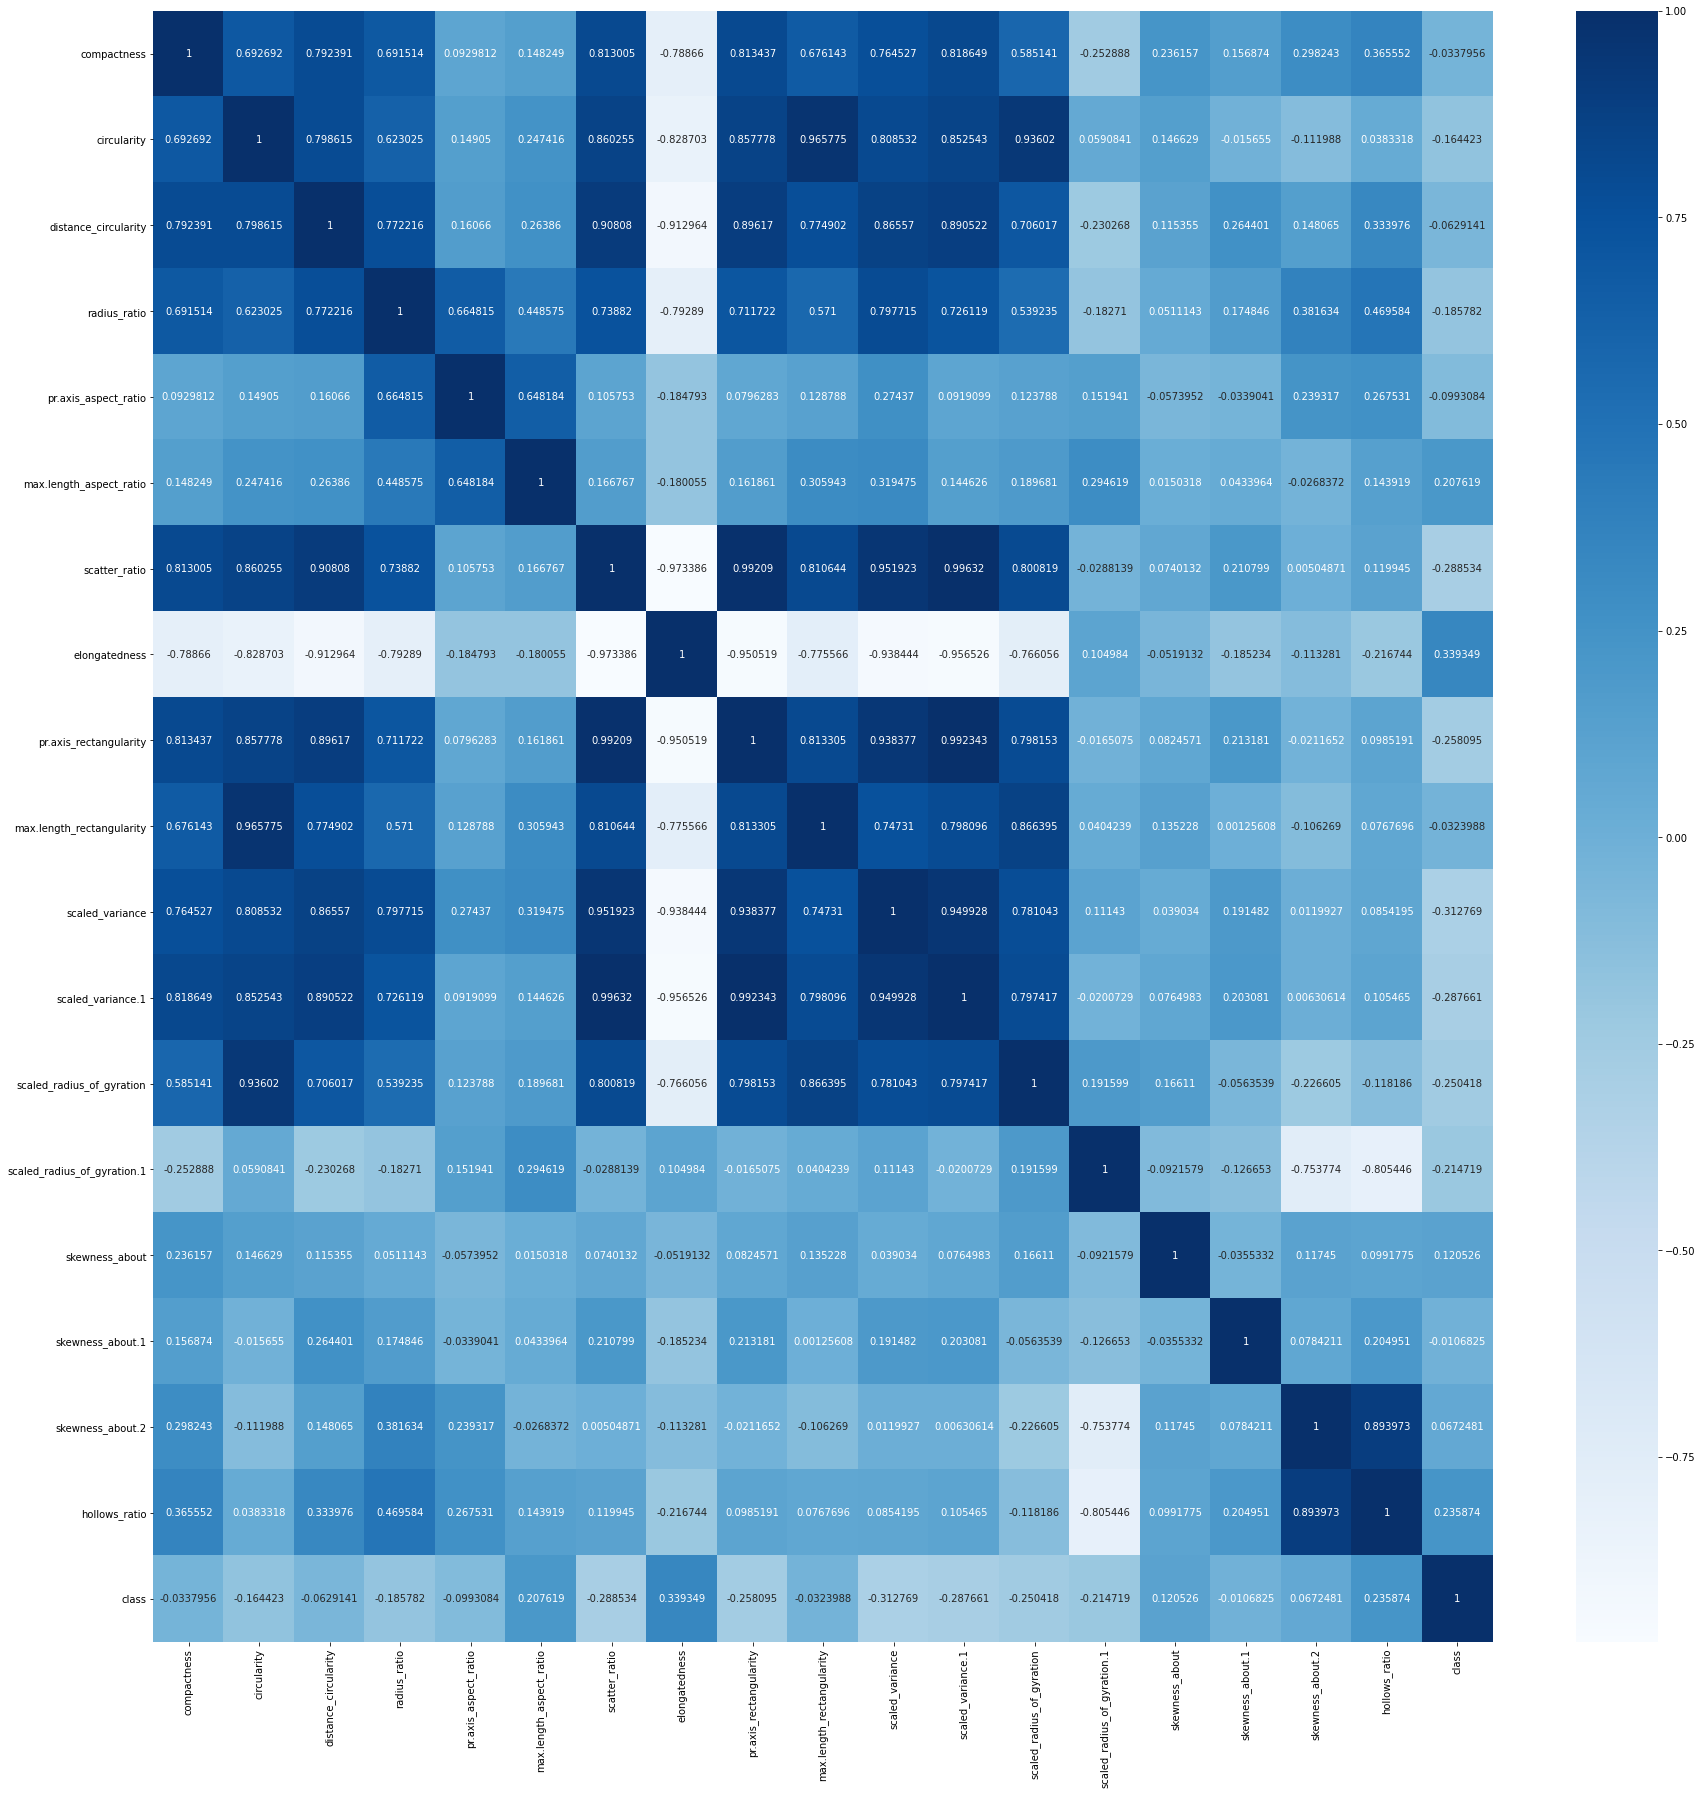

In [17]:
fig, ax = plt.subplots(figsize=(30,30))
corelation = dataset.corr()
sns.heatmap(corelation, annot=True, cmap='Blues', fmt='g', ax=ax ) 

<p>
  <h4><b>We can observe multicollinearity in the dataset</b></h4>
</p>
<ul>
  <li>distance_circularity is having high coorelation with scatter_ratio</li>
  <li>scatter_ratio is having high coorelation with scaled_varience.1</li>
  <li>scatter_ratio is having high coorelation with scaled_varience</li>
  <li>scatter_ratio is having high coorelation with pr.axis_rectangularity</li>
</ul>
<p>
  also we can see that there are many other varibles are having high coorelation with many other varibles.
</p>

In [24]:
columns = list(dataset.columns)
columns

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio',
 'class']

**<h4>Checking for disturbution of columns</h4>**

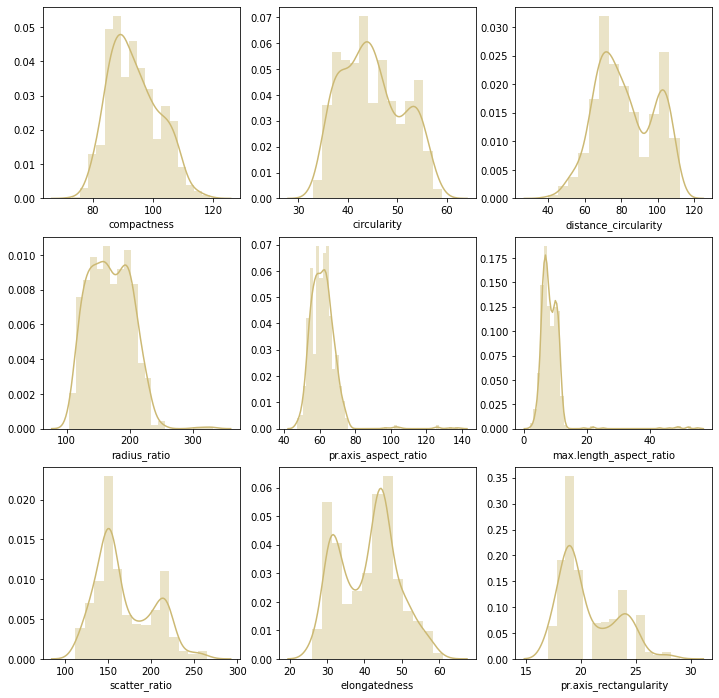

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
sns.set_color_codes()
sns.distplot(dataset[columns[0]], ax=axs[0][0], color='y')
sns.distplot(dataset[columns[1]], ax=axs[0][1], color='y')
sns.distplot(dataset[columns[2]], ax=axs[0][2], color='y')

sns.distplot(dataset[columns[3]], ax=axs[1][0], color='y')
sns.distplot(dataset[columns[4]], ax=axs[1][1], color='y')
sns.distplot(dataset[columns[5]], ax=axs[1][2], color='y')

sns.distplot(dataset[columns[6]], ax=axs[2][0], color='y')
sns.distplot(dataset[columns[7]], ax=axs[2][1], color='y')
sns.distplot(dataset[columns[8]], ax=axs[2][2], color='y')

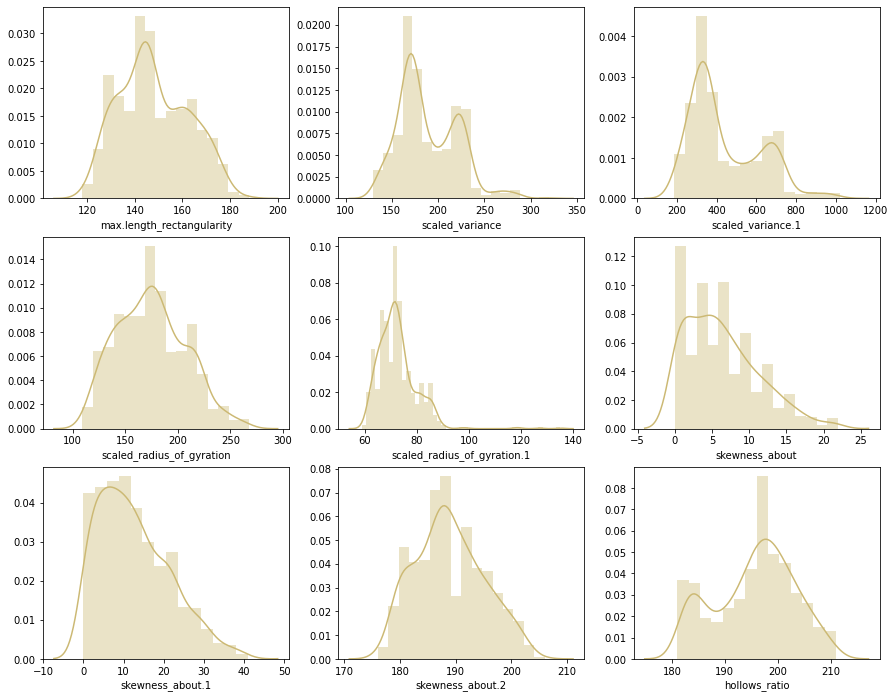

In [33]:
fig1, axs1 = plt.subplots(3, 3, figsize=(15, 12))
sns.set_color_codes()
sns.distplot(dataset[columns[9]], ax=axs1[0][0], color='y')
sns.distplot(dataset[columns[10]], ax=axs1[0][1], color='y')
sns.distplot(dataset[columns[11]], ax=axs1[0][2], color='y')

sns.distplot(dataset[columns[12]], ax=axs1[1][0], color='y')
sns.distplot(dataset[columns[13]], ax=axs1[1][1], color='y')
sns.distplot(dataset[columns[14]], ax=axs1[1][2], color='y')

sns.distplot(dataset[columns[15]], ax=axs1[2][0], color='y')
sns.distplot(dataset[columns[16]], ax=axs1[2][1], color='y')
sns.distplot(dataset[columns[17]], ax=axs1[2][2], color='y')

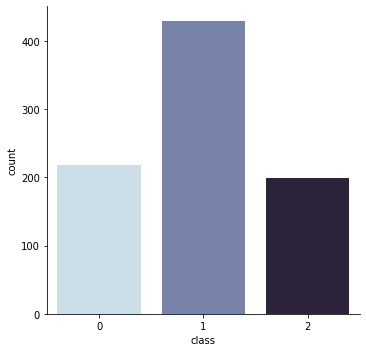

In [43]:
sns.catplot(x="class", kind="count", palette="ch:s=.25,rot=-.25", data=dataset);

<b><h4><u>Observation:</u></h4></b>
<ul>
  <li>From The above graphs we can see that records are more for class <b>1</b> than <b>2</b> and <b>0</b> so this is imbalaced data.</li>
  <li><b>compactness</b> is more like normal disturbution</li>
  <li>Disturbution of <b>max.length_rectangularity</b> & <b>scaled_radius_of_gyration</b> is more like to be same</li>
  <li><b>skewness_about.2</b> is more like normal disturbution</li>
  <li><b>skewness_about.1</b> is litle skew to right</li>
</ul>

<h4><b>Observing Outliers with boxplots</b></h4>

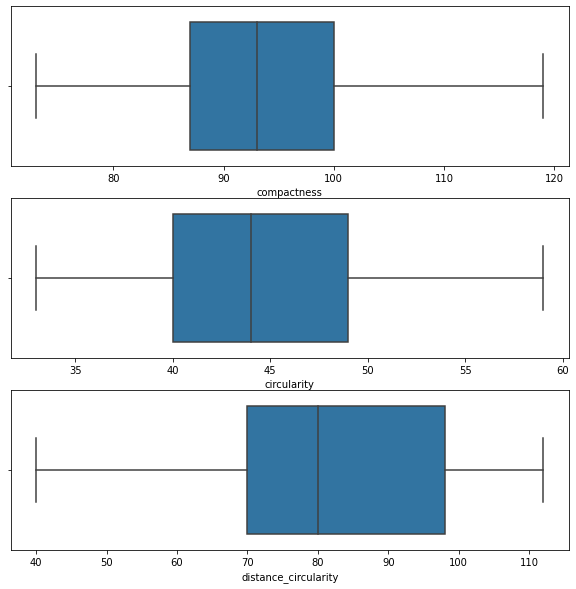

In [45]:
plt.figure(figsize= (10,10))
plt.subplot(3,1,1)
sns.boxplot(x= dataset[columns[0]])
plt.subplot(3,1,2)
sns.boxplot(x= dataset[columns[1]])
plt.subplot(3,1,3)
sns.boxplot(x= dataset[columns[2]])

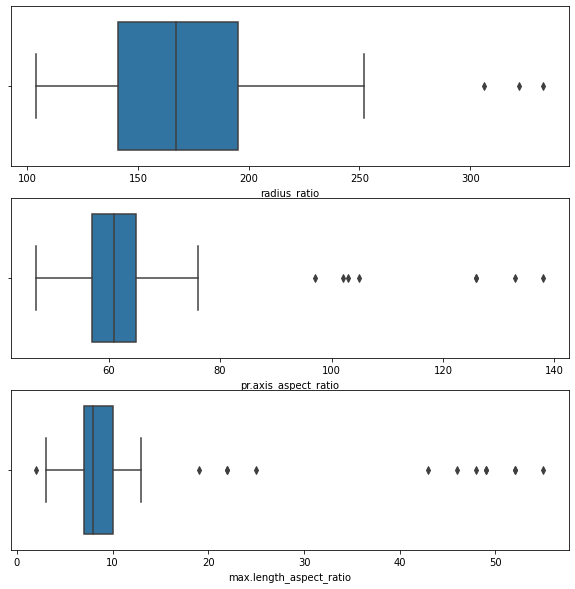

In [46]:
plt.figure(figsize= (10,10))
plt.subplot(3,1,1)
sns.boxplot(x= dataset[columns[3]])
plt.subplot(3,1,2)
sns.boxplot(x= dataset[columns[4]])
plt.subplot(3,1,3)
sns.boxplot(x= dataset[columns[5]])

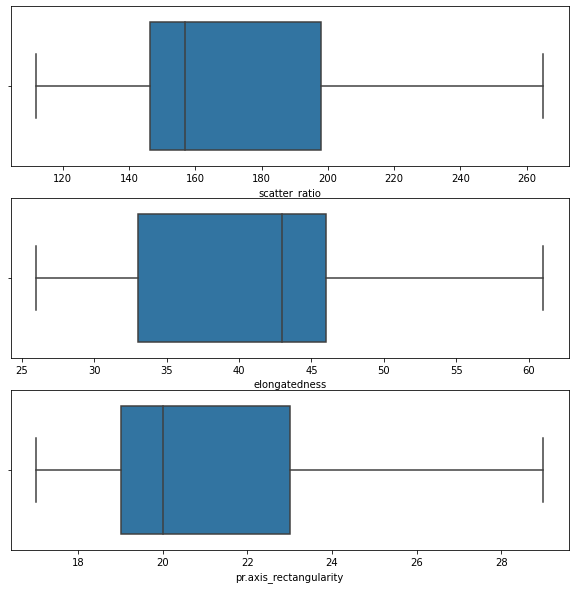

In [47]:
plt.figure(figsize= (10,10))
plt.subplot(3,1,1)
sns.boxplot(x= dataset[columns[6]])
plt.subplot(3,1,2)
sns.boxplot(x= dataset[columns[7]])
plt.subplot(3,1,3)
sns.boxplot(x= dataset[columns[8]])

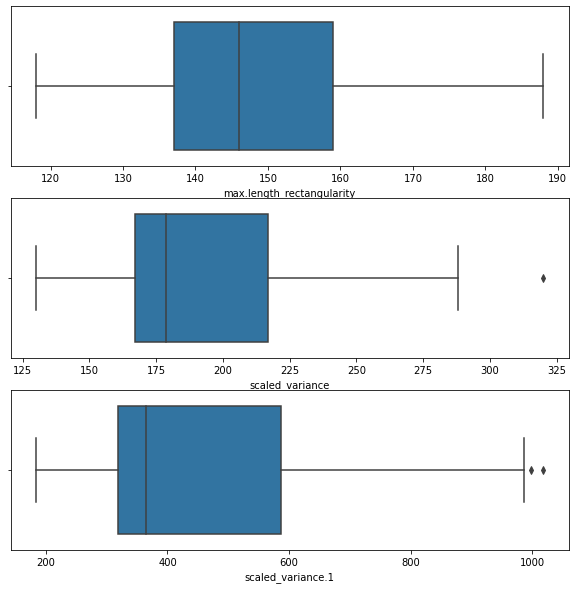

In [48]:
plt.figure(figsize= (10,10))
plt.subplot(3,1,1)
sns.boxplot(x= dataset[columns[9]])
plt.subplot(3,1,2)
sns.boxplot(x= dataset[columns[10]])
plt.subplot(3,1,3)
sns.boxplot(x= dataset[columns[11]])

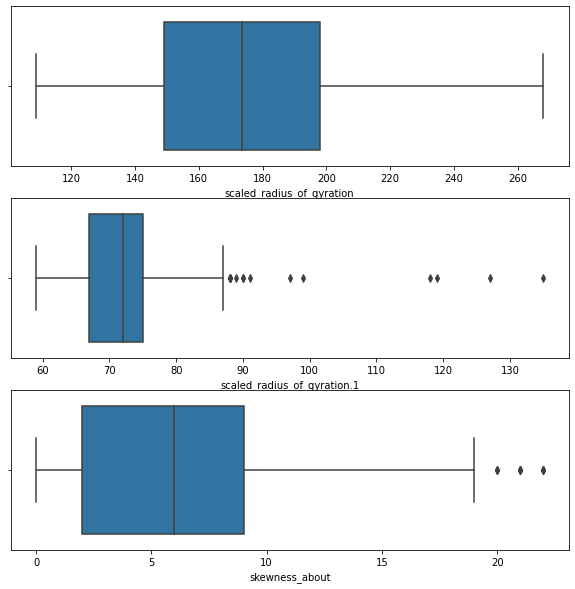

In [49]:
plt.figure(figsize= (10,10))
plt.subplot(3,1,1)
sns.boxplot(x= dataset[columns[12]])
plt.subplot(3,1,2)
sns.boxplot(x= dataset[columns[13]])
plt.subplot(3,1,3)
sns.boxplot(x= dataset[columns[14]])

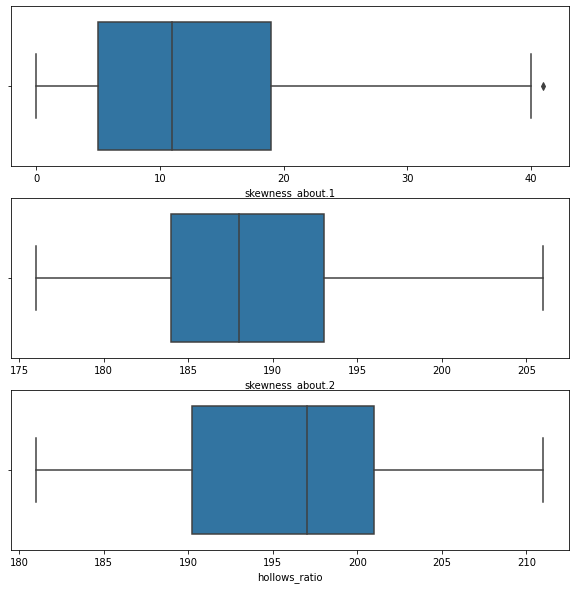

In [50]:
plt.figure(figsize= (10,10))
plt.subplot(3,1,1)
sns.boxplot(x= dataset[columns[15]])
plt.subplot(3,1,2)
sns.boxplot(x= dataset[columns[16]])
plt.subplot(3,1,3)
sns.boxplot(x= dataset[columns[17]])

<h4><b><u>Observation:</u></b></h4>
<ul>
  <li>In compactness, circularity and distance_circularity there are no outliers</li>
  <li>There are very few outliers in radius_ratio, pr.axis_aspect_racio</li>
  <li>There are very few outliers in radius_ratio, pr.axis_aspect_racio</li>
  <li>Ther are outliers on both side in max.length_aspect_ratio</li>
  <li>Ther are outliers noticed in scaled_radius_of_gyration.1, skewness_about,skewness_about.1</li>
</ul>

### <b>Model Building and Training</b>

**Seperating features (independent varibles) and targets (dependent variable)**

In [51]:
features = dataset.iloc[:, :-1]
targets = dataset.iloc[:, -1:]
print(features.shape)
print(targets.shape)

(846, 18)
(846, 1)


In [53]:
features.head()

compactness  circularity  ...  skewness_about.2  hollows_ratio
0         95.0         48.0  ...             187.0          197.0
1         91.0         41.0  ...             189.0          199.0
2        104.0         50.0  ...             188.0          196.0
3         93.0         41.0  ...             199.0          207.0
4         85.0         44.0  ...             180.0          183.0

[5 rows x 18 columns]

In [52]:
targets.head()

class
0      2
1      2
2      1
3      2
4      0

**Training SVM Before Standardising the Data**
<p><b>Train Test split of data in 70:30 ratio</b></p>

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(features, targets, test_size=0.3, random_state=42)
print(X_train_bs.shape)
print(X_test_bs.shape)
print(y_train_bs.shape)
print(y_test_bs.shape)

(592, 18)
(254, 18)
(592, 1)
(254, 1)


In [56]:
svc_bs = SVC()
svc_bs.fit(X_train_bs,y_train_bs)
svc_bs_pred = svc_bs.predict(X_test_bs)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
print("SVM BEFORE STANDARDIZATION CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test_bs, svc_bs_pred))

SVM BEFORE STANDARDIZATION CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.64      0.38      0.48        78
           1       0.74      0.80      0.77       118
           2       0.54      0.74      0.62        58

    accuracy                           0.66       254
   macro avg       0.64      0.64      0.62       254
weighted avg       0.66      0.66      0.65       254



CONFUSION MATRIX FOR SVM BEFORE STANDARDIZATION TEST DATASET




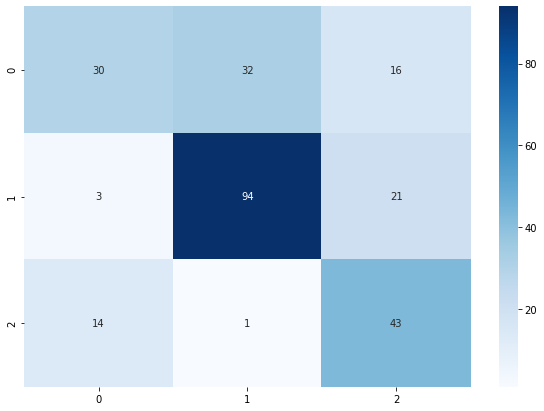

In [73]:
print("CONFUSION MATRIX FOR SVM BEFORE STANDARDIZATION TEST DATASET")
print("\n")
confusion_matrix_svm_bs = confusion_matrix(y_test_bs, svc_bs_pred)
confusion_matrix_svm_bs_df = pd.DataFrame(confusion_matrix_svm_bs)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_svm_bs_df, annot=True, cmap='Blues', fmt='g')

In [100]:
features_cpy = features.copy()
targets_cpy = targets.copy()

In [101]:
standardScaler = StandardScaler()
features_cpy = standardScaler.fit_transform(features_cpy)

In [102]:
targets_cpy = targets_cpy.values

In [103]:
#Train test split for scaled data set of features and targest
X_train_as, X_test_as, y_train_as, y_test_as = train_test_split(features_cpy, targets_cpy, test_size=0.3, random_state=42)

In [104]:
svc_as = SVC()
svc_as.fit(X_train_as,y_train_as)
svc_as_pred = svc_as.predict(X_test_as)

In [105]:
print("SVM AFTER STANDARDIZATION CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test_as, svc_as_pred))

SVM AFTER STANDARDIZATION CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.97      0.96      0.97        78
           1       0.97      0.97      0.97       118
           2       0.93      0.95      0.94        58

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



CONFUSION MATRIX FOR SVM AFTER STANDARDIZATION




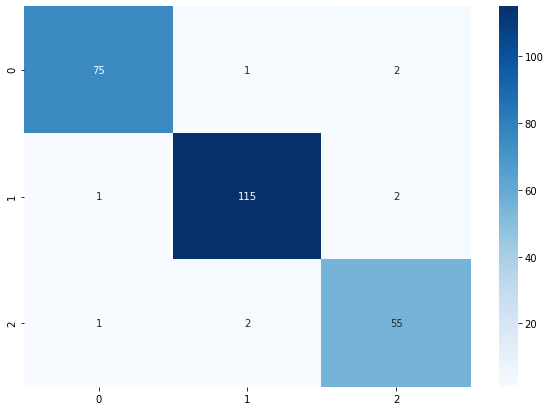

In [106]:
print("CONFUSION MATRIX FOR SVM AFTER STANDARDIZATION")
print("\n")
confusion_matrix_svm_as = confusion_matrix(y_test_as, svc_as_pred)
confusion_matrix_svm_as_df = pd.DataFrame(confusion_matrix_svm_as)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_svm_as_df, annot=True, cmap='Blues', fmt='g')

**PCA For Dimension reduction**

In [87]:
from sklearn.decomposition import PCA

In [141]:
pca = PCA(n_components=7)

In [142]:
pca_x_train = pca.fit_transform(X_train_as)
pca_x_test = pca.transform(X_test_as)

In [143]:
pca.explained_variance_ratio_.cumsum()

array([0.51654774, 0.6834612 , 0.79744038, 0.8643958 , 0.91483185,
       0.94299299, 0.96245217])

In [145]:
pca.explained_variance_ratio_.sum() 

0.962452172985377

**From the abvove result we can see that 96.24% of the variance is explained by just 7 Principal components**

In [130]:
pca_x_train.shape, pca_x_test.shape

((592, 6), (254, 6))

In [137]:
svc_as_pca = SVC()
svc_as_pca.fit(pca_x_train, y_train_as)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [138]:
svc_as_pca_pred = svc_as_pca.predict(pca_x_test)

In [139]:
print("SVM AFTER STANDARDIZATION AND PCA 7 PCA_COMPONENTS CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test_as, svc_as_pca_pred))

SVM AFTER STANDARDIZATION AND PCA 7 PCA_COMPONENTS CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.94      0.81      0.87        78
           1       0.88      0.93      0.91       118
           2       0.87      0.93      0.90        58

    accuracy                           0.89       254
   macro avg       0.90      0.89      0.89       254
weighted avg       0.90      0.89      0.89       254



CONFUSION MATRIX FOR SVM AFTER STANDARDIZATION AND PCA 7 PCA_COMPONENTS




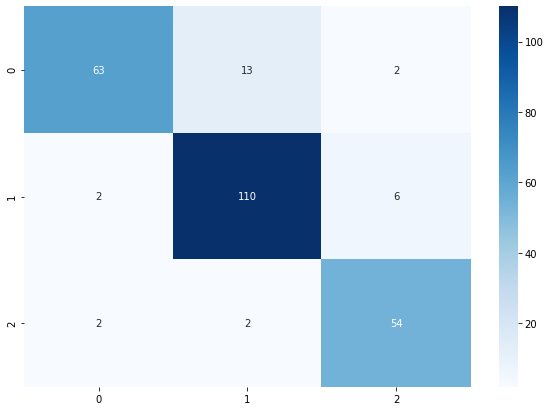

In [140]:
print("CONFUSION MATRIX FOR SVM AFTER STANDARDIZATION AND PCA 7 PCA_COMPONENTS")
print("\n")
confusion_matrix_svm_as_pca = confusion_matrix(y_test_as, svc_as_pca_pred)
confusion_matrix_svm_as_df_pca = pd.DataFrame(confusion_matrix_svm_as_pca)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_svm_as_df_pca, annot=True, cmap='Blues', fmt='g')

#### **CONCLUSION:**

**Model Summary Table**
<table>
  <thead>
    <tr>
      <td>Model Name</td>
      <td>Descreption</td>
      <td>Accuracy</td>
      <td>precision-0</td>
      <td>precision-1</td>
      <td>precision-2</td>
      <td>recall-0</td>
      <td>recall-1</td>
      <td>recall-2</td>
      <td>f1-score-0</td>
      <td>f1-score-1</td>
      <td>f1-score-2</td>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>SVM</td>
      <td>Without Standard scaler</td>
      <td>0.66</td>
      <td>0.64</td>
      <td>0.74</td>
      <td>0.50</td>
      <td>0.38</td>
      <td>0.80</td>
      <td>0.74</td>
      <td>0.48</td>
      <td>0.77</td>
      <td>0.62</td>
    </tr>
    <tr>
      <td>SVM</td>
      <td>With Standard scaler</td>
      <td>0.96</td>
      <td>0.97</td>
      <td>0.97</td>
      <td>0.93</td>
      <td>0.96</td>
      <td>0.97</td>
      <td>0.95</td>
      <td>0.97</td>
      <td>0.97</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>SVM</td>
      <td>With Standard scaler and PCA</td>
      <td>0.89</td>
      <td>0.94</td>
      <td>0.88</td>
      <td>0.87</td>
      <td>0.81</td>
      <td>0.93</td>
      <td>0.93</td>
      <td>0.87</td>
      <td>0.91</td>
      <td>0.90</td>
    </tr>
  </tbody>
</table>
<p>
  Based on the summary report we can see observe svm after applying standard scaler has the best performance. By applying PCA the accuracy has reduced from <b>96%</b> to <b>89%</b> But also the independent variables also have been reduced from <b>18</b> to <b> 7 </b> with <b>96% of explained varience</b> hence
computational cost will also reduce. PCA well suits where there are more than 100 of the variables. <b>But For This Case It is Not Necessary To Apply PCA As There Are Only 18 Independent Variables.</b>
</p>